<a href="https://colab.research.google.com/github/garrettfarley9/Machine-Learning-Final-Project--Farley-Garrett-/blob/main/Farley_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from yellowbrick.regressor import ResidualsPlot
from google.colab import files
files.upload()

{}

#Data

In [2]:
bdf = pd.read_csv('SeoulBikeData.csv', encoding = 'unicode_escape')
bdf.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [3]:
'''
ToDo: Add column with name of days
ToDo: Convert 'Date' column to parsable format for StandardScaler

#bdf['Date'] = bdf['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y'))
#bdf['Day of Week'] = bdf['Date'].apply(lambda x: pd.Series.dt.day_name(x))
'''
bdf['Hour avg'] = bdf.groupby(['Hour'])['Rented Bike Count'].transform('mean')
bdf['Season avg'] = bdf.groupby(['Seasons'])['Rented Bike Count'].transform('mean')


#plot = sns.barplot(data = bdf, x = 'Seasons', y = 'Season avg')
#plot = sns.boxplot(data = bdf, x = 'Holiday', y = 'Rented Bike Count')
#plot = sns.boxplot(data = bdf, x = 'Seasons', y = 'Rented Bike Count')
#plot = sns.lineplot(data = bdf, x = 'Hour', y = 'Rented Bike Count')
#plot = sns.lineplot(data = bdf, x= 'Temperature(°C)', y = 'Rented Bike Count')
#plot = sns.scatterplot(data = bdf, x= 'Rainfall(mm)', y = 'Rented Bike Count')

#Plots

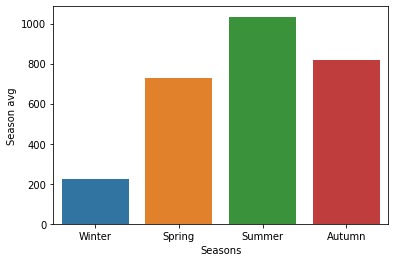

In [ ]:
plot = sns.barplot(data = bdf, x = 'Seasons', y = 'Season avg')

This plot shows aggregated seasonal average of bike rental volume by season.

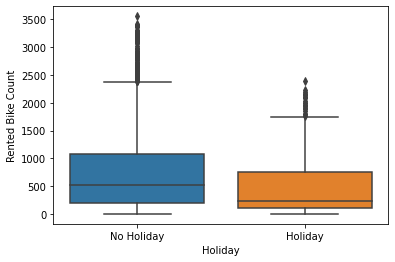

In [ ]:
plot = sns.boxplot(data = bdf, x = 'Holiday', y = 'Rented Bike Count')

This plot shows the number of rented bikes on Holiday vs No Holiday

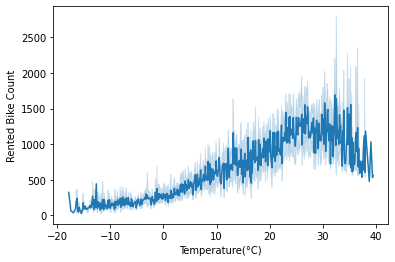

In [ ]:
plot = sns.lineplot(data = bdf, x= 'Temperature(°C)', y = 'Rented Bike Count')

This plot shows the rented bike count as a function of temperature.

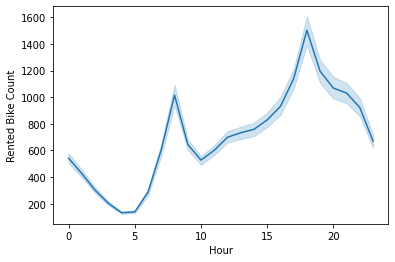

In [ ]:
plot = sns.lineplot(data = bdf, x = 'Hour', y = 'Rented Bike Count')

This plot shows the rented bike count as a function of time in the day.

#Analysis

There are some relationships between features and the rented bike count that I can use to predict the volume of bike rentals in a given hour. The time of day matters and we even see two spikes where people are going to work, and coming from work. We even see that in the plot of Holidays vs Non-Holidays where holidays don't see as many rentals. There is a seasonal relationship that is likely connected to the temperature more than anything. It seems that the temperature outside matters a lot when people consider a bike ride and the warmer it gets, the more variable the data gets. The other features were really noisy when compared to bike rental numbers or they were corelated to another variable, e.g. humidity and dew point with temperature.

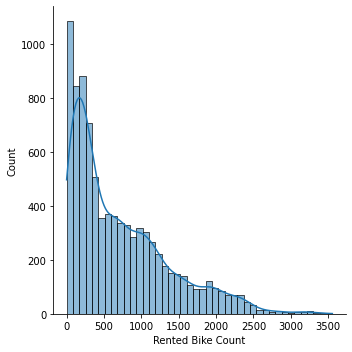

In [6]:
plot = sns.displot(bdf, x = 'Rented Bike Count', kde = True)

In [34]:
bdf.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Hour avg                     0
Season avg                   0
dtype: int64

In [4]:


le = LabelEncoder()
bdf['Holiday'] = le.fit_transform(bdf['Holiday'])
bdf['Functioning Day'] = le.fit_transform(bdf['Holiday'])


temp = pd.get_dummies(bdf, columns = ['Seasons'])
temp = temp.filter(regex = 'Seasons_\w+')
bdf = pd.concat([bdf, temp], axis = 1)
bdf = bdf.drop(columns = ['Seasons'])



In [5]:

y_data = bdf['Rented Bike Count']
x_data = bdf.drop(columns = ['Rented Bike Count', 'Date'])

scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 4200)
#initialize linear regression model object
lin_reg = linear_model.LinearRegression()
log_reg = linear_model.LogisticRegression()
#train model
lin_reg = lin_reg.fit(x_train, y_train)
log_reg = log_reg.fit(x_train, y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


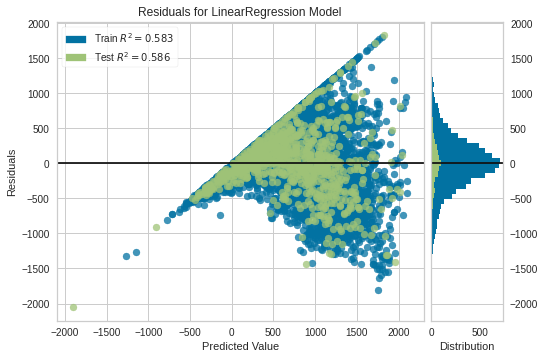

In [9]:
#Check accuracy
lin_reg.predict(x_test)
lin_reg.score(x_test, y_test)

#log_reg.predict(x_test)
#log_reg.score(x_test, y_test)

viz = ResidualsPlot(lin_reg)
viz.fit(x_train,y_train)
viz.score(x_test, y_test)
viz.show()

In [17]:
#bdf.dtypes
#bdf['Humidity(%)'].unique()
#bdf.loc[bdf['Visibility (10m)'] != 2000]


In [16]:
p = [0.2, 0.3, 0.5, 0.7, 0.8, 0.9]

for percent in p:
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = p, random_state = 4200)
  lin_reg = linear_model.LinearRegression()
  lin_reg = lin_reg.fit(x_train, y_train)

  viz = ResidualsPlot(lin_reg)
  viz.fit(x_train,y_train)
  viz.score(x_test, y_test)
  viz.show()



TypeError: ignored